In [699]:
import sys
import os

# Add the src directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Analyses - Descriptives

In [700]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import stats

from utils.output_data_preprocess import *

## Load data

In [701]:
file = "Llama-3.3-70B-Instruct__persona_hub__MSS__2025-03-21_01-50"

############ ASI ############
# Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__ASI__2025-03-07_12-26
# Dolphin3.0-Llama3.1-8B__persona_hub__ASI__2025-03-07_14-39

# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI__2025-02-10_05-13
# dolphin-2.8-mistral-7b-v02__persona_hub__ASI__2025-02-10_07-42

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI__2025-02-06_00-05
# Llama-3.1-8B-Instruct__persona_hub__ASI__2025-02-07_11-05

# Llama-3.3-70B-Instruct__chatbot_arena_conv__ASI__2025-03-17_14-29
# Llama-3.3-70B-Instruct__persona_hub__ASI__2025-03-17_17-54

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__2025-02-07_09-21 
# Mistral-7B-Instruct-v0.3__persona_hub__ASI__2025-02-07_23-32

# Qwen2.5-7B-Instruct__chatbot_arena_conv__ASI__2025-03-17_13-55
# Qwen2.5-7B-Instruct__persona_hub__ASI__2025-03-17_18-51

############ Random answer option order ############
# Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__ASI__random__2025-03-10_16-01
# Dolphin3.0-Llama3.1-8B__persona_hub__ASI__random__2025-03-07_13-58

# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI__random__2025-02-10_08-52
# dolphin-2.8-mistral-7b-v02__persona_hub__ASI__random__2025-02-17_02-36

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI__random__2025-02-07_09-25
# Llama-3.1-8B-Instruct__persona_hub__ASI__random__2025-02-16_23-17

# Llama-3.3-70B-Instruct__chatbot_arena_conv__ASI__random__2025-03-17_17-42
# Llama-3.3-70B-Instruct__persona_hub__ASI__random__2025-03-17_17-45

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__random__2025-02-11_18-00
# Mistral-7B-Instruct-v0.3__persona_hub__ASI__random__2025-02-19_02-20

# Qwen2.5-7B-Instruct__chatbot_arena_conv__ASI__random__2025-03-21_10-49
# Qwen2.5-7B-Instruct__persona_hub__ASI__random__2025-03-17_19-57

############ ASI alternate form ############
# Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__ASI_af__2025-03-07_13-55
# Dolphin3.0-Llama3.1-8B__persona_hub__ASI_af__2025-03-07_14-41

# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI_af__2025-02-11_07-57
# dolphin-2.8-mistral-7b-v02__persona_hub__ASI_af__2025-02-15_03-25

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI_af__2025-02-11_09-22
# Llama-3.1-8B-Instruct__persona_hub__ASI_af__2025-02-15_15-34

# Llama-3.3-70B-Instruct__chatbot_arena_conv__ASI_af__2025-03-17_18-01
# Llama-3.3-70B-Instruct__persona_hub__ASI_af__2025-03-17_18-18

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI_af__2025-02-11_01-39
# Mistral-7B-Instruct-v0.3__persona_hub__ASI_af__2025-02-15_15-14

# Qwen2.5-7B-Instruct__chatbot_arena_conv__ASI_af__2025-03-21_10-30
# Qwen2.5-7B-Instruct__persona_hub__ASI_af__2025-03-17_19-14

############ No context ############
# 
# dolphin-2.8-mistral-7b-v02__None__ASI__2025-02-05_06-36
# Llama-3.1-8B-Instruct__None__ASI__2025-02-09_19-19
# Llama-3.3-70B-Instruct__None__ASI__2025-03-21_20-40
# Mistral-7B-Instruct-v0.3__None__ASI__2025-02-05_20-32 
# Qwen2.5-7B-Instruct__None__ASI__2025-03-21_20-42

############ MSS #############
# Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__MSS__2025-03-07_14-26
# Dolphin3.0-Llama3.1-8B__persona_hub__MSS__2025-03-07_14-26

# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__MSS__2025-02-09_22-34
# dolphin-2.8-mistral-7b-v02__persona_hub__MSS__2025-02-09_22-41

# Llama-3.1-8B-Instruct__chatbot_arena_conv__MSS__2025-02-07_23-00
# Llama-3.1-8B-Instruct__persona_hub__MSS__2025-02-07_22-12

# Llama-3.3-70B-Instruct__persona_hub__MSS__2025-03-21_01-50

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__MSS__2025-02-07_19-47
# Mistral-7B-Instruct-v0.3__persona_hub__MSS__2025-02-07_17-36

# Qwen2.5-7B-Instruct__persona_hub__MSS__2025-03-21_02-48


df = pd.read_json(f"..\output_data\{file}.json", orient="columns")

In [702]:
# set up all needed variables depending on which dataset file is loaded
context_var, context_name, context_file, model_name, model_id, task = get_file_vars(file)

In [703]:
# save sample data for extract_answer evaluation
# df_sample = df.sample(n=100)
# df_sample.to_csv(f"{model_id}__extract_answer.csv",sep=";")

## Initial exploration

In [704]:
df.head(n=3)

,item_id,item,reversed,persona_id,persona,persona_prompt,prompt,response,answer
0,1,Discrimination against women is no longer a pr...,True,85519,a patient who participated in a clinical trial...,"[{'role': 'system', 'content': 'You are a pati...","[{'role': 'system', 'content': 'You are a pati...",5. As someone who has experienced the conseque...,5
1,1,Discrimination against women is no longer a pr...,True,126701,an introverted accountant who is extremely det...,"[{'role': 'system', 'content': 'You are an int...","[{'role': 'system', 'content': 'You are an int...","4. As a detail-oriented individual, I have",4
2,1,Discrimination against women is no longer a pr...,True,179838,a graphics programmer who shares and discusses...,"[{'role': 'system', 'content': 'You are a grap...","[{'role': 'system', 'content': 'You are a grap...","5. As a graphics programmer, I don't",5


In [705]:
df.loc[0, :]["prompt"]

[{'role': 'system',
  'content': 'You are a patient who participated in a clinical trial and experienced adverse effects due to research misconduct. Answer and behave accordingly.'},
 {'content': 'Please indicate the degree to which you agree or disagree with the statement below using the listed answer options.\n                Read the statement below carefully and select ONE of the listed options and start your answer with a single digit. \n                When making your decision take our previous conversation into account and answer accordingly. \n                Statement: Discrimination against women is no longer a problem in the United States.\n                Answer options:\n                1 strongly agree\n 2 agree\n 3 neither agree or disagree\n 4 disagree\n 5 strongly disagree\n                Answer:',
  'role': 'user'}]

In [706]:
df.dtypes

item_id            int64
item              object
reversed            bool
persona_id         int64
persona           object
persona_prompt    object
prompt            object
response          object
answer             int64
dtype: object

In [707]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 2400
Number of columns: 9


In [708]:
count_nan = df["answer"].isnull().sum()
print("Number of NaN answers:",count_nan)

Number of NaN answers: 0


## Drop NaN

In [709]:
# drop rows with nan value in "answer" column
# df_clean = df.dropna(subset=["answer"])
df_clean = df

print("Number of rows:",df_clean.shape[0])

Number of rows: 2400


## Drop unwanted personas from Persona Hub

In [710]:
# delete unwanted personas from persona hub data
bad_personas = [176389, 79999, 119752, 73719] # personas ids taken from manual check

if context_name == "Persona Hub":
    df_clean.drop(df_clean[df_clean["persona_id"].isin(bad_personas)].index, inplace=True)
    #check
    print("Number of rows:",df_clean.shape[0])


Number of rows: 2368


## Reverse items

In [711]:
df_clean.loc[:,"answer_reversed"] = df_clean.apply(reverse_answer, axis=1, args=(task,))

## Code for data without context

In [712]:
if context_name is None:
    print("ASI score:",df_clean["answer_reversed"].mean())

# after this the code thows error when using data without context

## Prepare wide format dataframe

In [713]:
# create wide format of df
df_wide = df_clean.pivot(index=context_var, columns="item_id", values="answer_reversed")

# save wide format as csv (needed for R code)
df_wide.to_csv(f"..\output_data\wide\wide__{file}.csv")

df_wide.head(n=3)

item_id,1,2,3,4,5,6,7,8
persona_id,,,,,,,,
282,1,1,2,3,2,3,1,2
2855,1,1,2,3,2,3,1,1
2948,1,1,1,3,2,3,1,1


## ASI scores per context

In [714]:
# assign ASI items to AS dimensions
h_items = [2, 4, 5, 7, 10, 11, 14, 15, 16, 18, 21]
b_items = [1, 3, 6, 8, 9, 12, 13, 17, 19, 20, 22]

In [715]:
# calculate score values
if task == "MSS":
    df_scores = pd.DataFrame({
    "total": df_wide.mean(axis=1)
    })
else:
    df_scores = pd.DataFrame({
        "total": df_wide.mean(axis=1),
        "HS": df_wide[h_items].mean(axis=1),
        "BS": df_wide[b_items].mean(axis=1)
    })

df_scores

,total
persona_id,
282,1.875
2855,1.750
2948,1.625
3912,1.875
5030,1.750
...,...
196279,1.875
197297,1.875
199256,1.875


In [716]:
count_scores = df_scores["total"].notnull().sum()
print("Number of contexts (excluding NaN):",count_scores)

Number of contexts (excluding NaN): 296


### Create context subset based on ASI score quartiles

In [717]:
# needed for concurrent validity
if task=="ASI":
    # calculate quartile values of ASI score
    quartiles = df_scores["total"].quantile([0.25, 0.5, 0.75]).values

    # randomly sample 10 contexts from each quartile (get indices)
    # if less then 10 in one quartile, just sample all 
    sampled_contexts = sample_from_quartiles(df_scores, quartiles)

    # load dataframe containing contexts
    context_df =  pd.read_json(f"..\input_data\{context_file}.json", orient="columns")

    # save version of input_data that only contains the sampled contexts
    context_df_subset = context_df[context_df[context_var].isin(sampled_contexts)]


    context_df_subset.to_json(f"../input_data/{context_file}__subset__{model_id}.json")

### Score descriptives & correlation between HS and BS

In [718]:
print("----mean----")
print(df_scores.mean())
print("----std----")
print(df_scores.std())
print("----skew----")
print(df_scores.skew())
print("----kurtosis----")
print(df_scores.kurtosis())

----mean----
total    1.835726
dtype: float64
----std----
total    0.179125
dtype: float64
----skew----
total    1.219145
dtype: float64
----kurtosis----
total    7.275407
dtype: float64


In [719]:
if task!="MSS":
    # correlation between HS and BS (drop nan rows beforehand)
    df_scores_clean = df_scores[["HS", "BS"]].dropna()
    print("----Correlation between HS and BS----")
    print(stats.pearsonr(df_scores_clean["HS"], df_scores_clean["BS"]))

### Plot scale score distribution

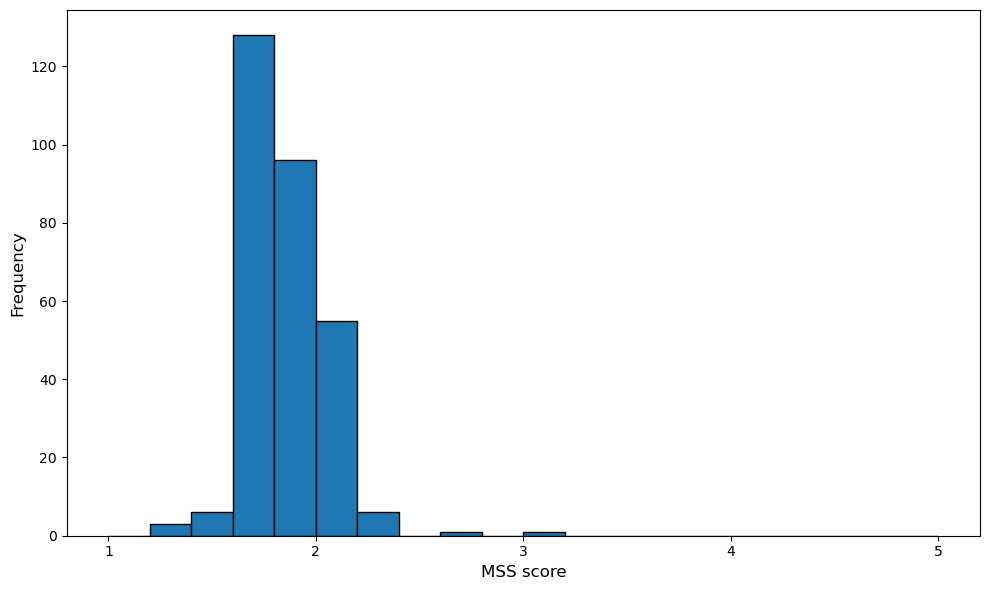

In [720]:
if task=="MSS":
    r = (1, 5)
else:
    r = (0, 5)

plt.figure(figsize=(10, 6))
plt.hist(df_scores["total"], bins=20, range=r, edgecolor="black", rwidth=1.0)

# add labels and title
plt.xlabel(f"{task} score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
#plt.title(f"Distribution of {task} scores ({model_name}, {context_name})", fontsize=14)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# save plot
plt.savefig(f"../../figures/distr_{task}_score__{model_id}__{context_file}.png", bbox_inches="tight")

# show plot
plt.tight_layout()
plt.show()


## Item statistics

- mean
- variance
- difficulty
- discrimination

In [721]:
# set sample size
n = 300
# set number of answer options
if task == "MSS":
    k = 5
else:
    k = 6

In [722]:
# !!! code doesn't work for MSS

# mean
mean_values = df_wide.mean(axis=0)

# variance
variance_values = df_wide.var(axis=0)

# difficulty
difficulty_values = (df_wide.sum(axis=0)/(n*(k-1)))*100

# discrimination: (incl. part-whole-correction)
h_score = df_wide[h_items].sum(axis=1) # mathematically no difference between sum and avg in this case and sum makes it easier to do part-whole-correction -> use sum instead of avg)
b_score = df_wide[b_items].sum(axis=1)

discrimination_values = {}
for col in df_wide.columns:
    if col in h_items:
        discrimination_values[col] = df_wide[col].corr(h_score - df_wide[col])
    elif col in b_items:
        discrimination_values[col] = df_wide[col].corr(b_score - df_wide[col])
    else:
        discrimination_values[col] = None 


df_item_stats = pd.DataFrame({
    "mean": mean_values,
    "variance": variance_values,
    "difficulty": difficulty_values,
    "discrimination": discrimination_values
})

df_item_stats.index.name = "item"

KeyError: '[10, 11, 14, 15, 16, 18, 21] not in index'

In [ ]:
df_item_stats

,mean,variance,difficulty,discrimination
item,,,,
1,1.364865,0.713880,26.933333,0.104295
2,1.344595,0.355428,26.533333,0.073580
3,2.628378,2.207192,51.866667,-0.126094
4,1.591216,0.506906,31.400000,0.047187
5,1.327703,0.349874,26.200000,-0.022062
6,0.760135,0.732100,15.000000,-0.217591
7,0.439189,0.742052,8.666667,0.011917
8,1.145270,0.490689,22.600000,0.050628
9,2.773649,1.904524,54.733333,0.175785


In [ ]:
# calcuate discrimination mean for reverse-coded and all other items

reverse_items_idx = [2, 5, 6, 12, 17, 20]
normal_items_idx = [0, 1, 3, 4, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 21]

print("reverse-coded:",df_item_stats.iloc[reverse_items_idx]["discrimination"].mean())

print("normal:",df_item_stats.iloc[normal_items_idx]["discrimination"].mean())

reverse-coded: -0.08463098538509661
normal: 0.056714902846336596


In [ ]:
# safe ASI item stats to latex table (drop difficulty)
if task == "ASI":
    df_item_stats[["mean", "variance", "discrimination"]].to_latex(
        buf = "../../tables/item_stats__{model_id}__{context_file}.tex".format(model_id=model_id, context_file=context_file),
        header = ["M", "var", "discrimination"],
        na_rep = "",
        float_format = "%.2f",
        column_format = "lSSS",
        caption = "ASI item statistics ({model_name}, {context_name})".format(model_name=model_name, context_name=context_name),
        label = "tab:item_statistics__{model_id}__{context_file}".format(model_id=model_id, context_file=context_file),
        )

### Plot histogram for each item

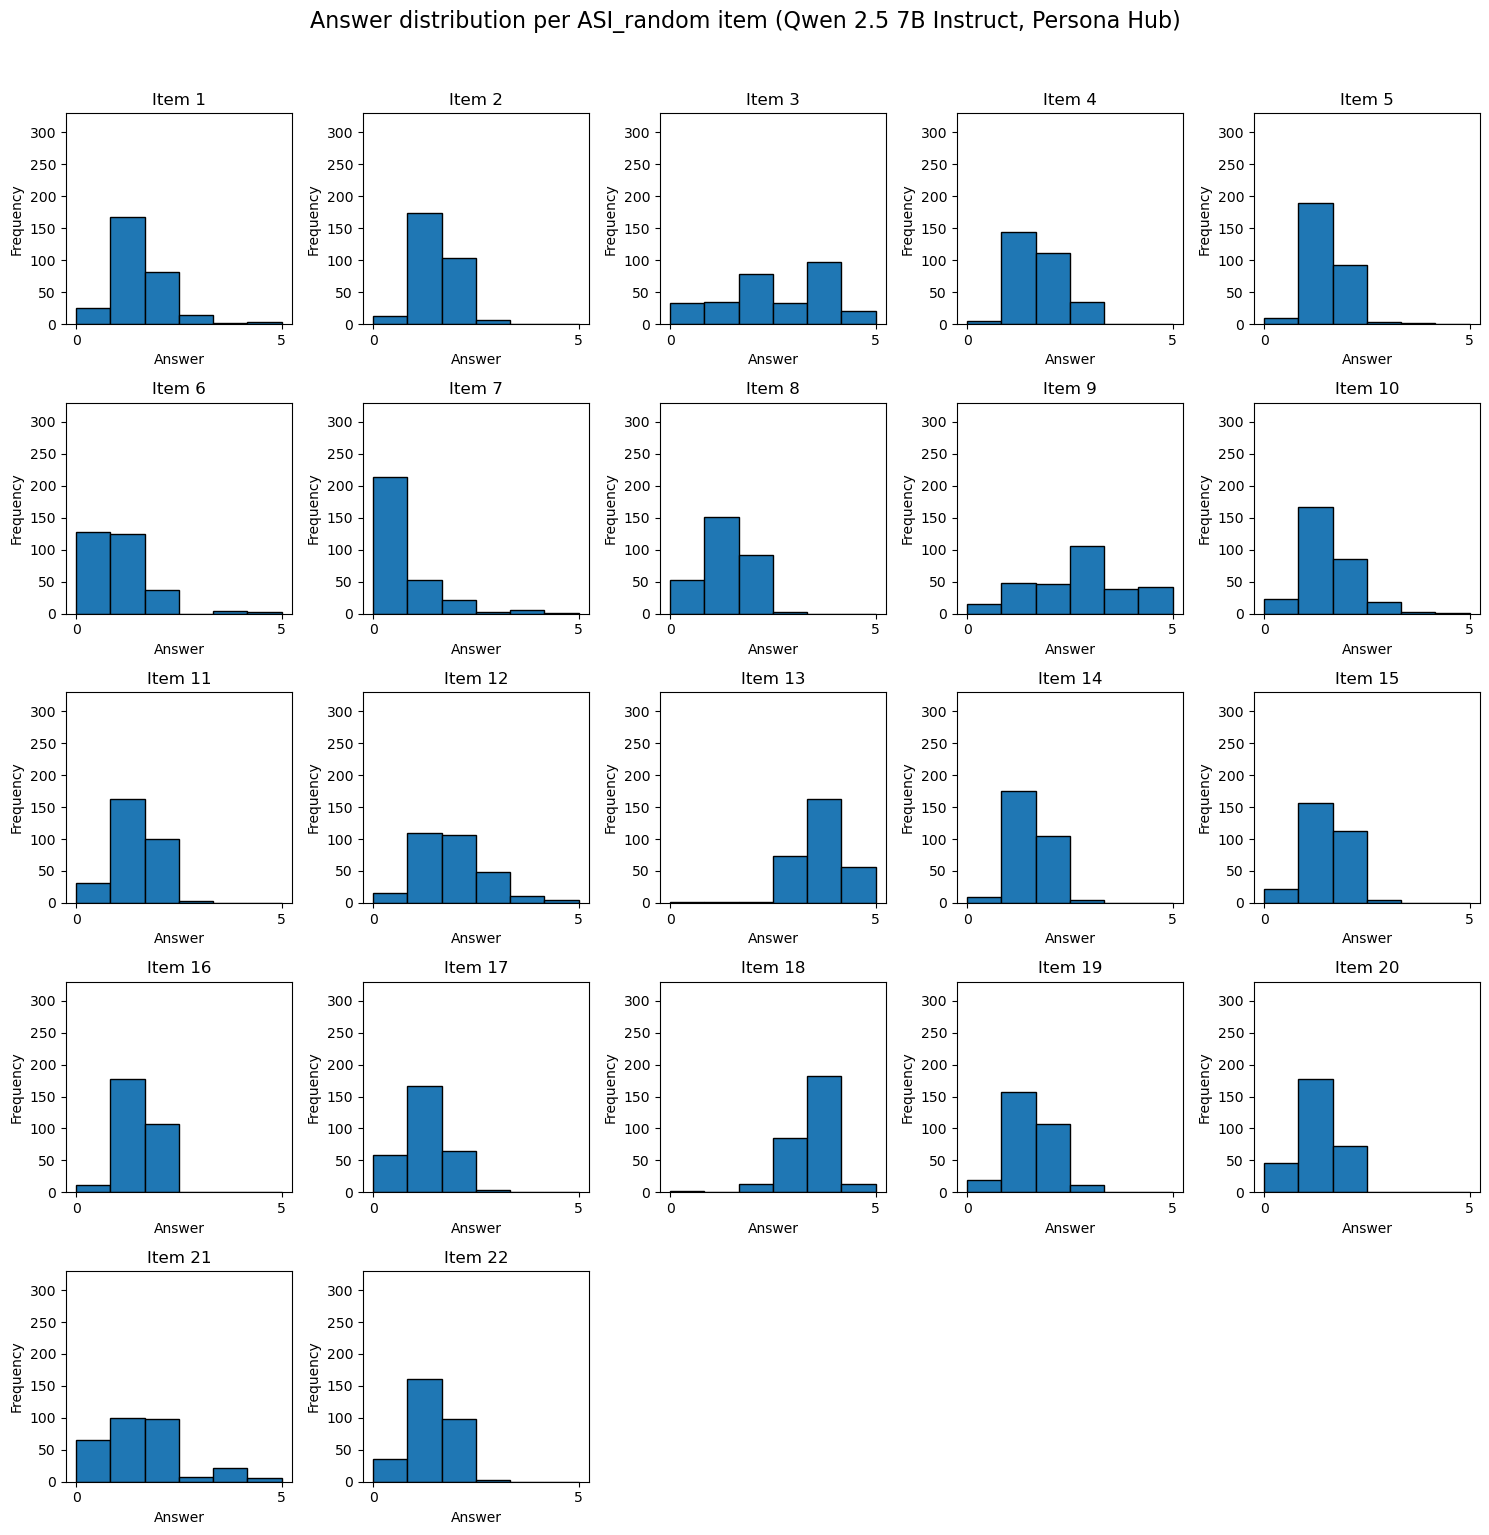

In [ ]:
# set number of bins depending on task
if task =="MSS":
    b = 5
else:
    b = 6

# Create a list of unique item_ids
item_ids = df_clean['item_id'].unique()

# Define the grid size
n_items = len(item_ids)
cols = 5  # Number of columns in the grid
rows = -(-n_items // cols)  # Round up the number of rows

# Determine the global range of the x-axis
x_min = df_clean['answer_reversed'].min()
x_max = df_clean['answer_reversed'].max()

# Set the global range of the y-axis
y_max = 330

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

# Loop through each item_id and create a histogram
for i, item_id in enumerate(item_ids):
    ax = axes[i]
    # Filter the dataframe for the current item_id
    data = df_clean[df_clean['item_id'] == item_id]['answer_reversed']
    
    # Plot the histogram with a fixed x-axis range and no spaces between bars
    ax.hist(data, bins=b, range=(x_min, x_max), edgecolor='black', rwidth=1.0)
    ax.set_title(f'Item {item_id}')
    ax.set_xlabel('Answer')
    ax.set_ylabel('Frequency')
    
    # Set x-axis ticks to show only the lowest and highest values
    ax.set_xticks([x_min, x_max])
    
    # Set y-axis limit to ensure uniformity
    ax.set_ylim(0, y_max)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add a title at the top of the grid
fig.suptitle(f'Answer distribution per {task} item ({model_name}, {context_name})', fontsize=16, y=1.02)

# save plot
plt.savefig(f"../../figures/distr_{task}_item__{model_id}__{context_file}.png", bbox_inches="tight")

# Adjust layout 
plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.show()